# Building a null model for knowledge graph feature explanation...

Basically... how does our feature set differ from a randomly chosen one?

In [1]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import kgfe

## 1. Load genes

In [2]:
data = pd.read_excel('LC_mets_prots_V1_V2_Compare.xlsx')

In [3]:
data.head()

,ID,Lasso_CV,Name,UniProt,Protein,PubChem,Chembl_ID,KEGG
0,met10,-0.100203,"1,2,4-benzenetriol",NaN,NaN,10787.0,CHEMBL3092389,C02814
1,met1054,-0.052794,pyridine,NaN,NaN,1049.0,CHEMBL266158,C00747
2,met1073,0.051544,uric acid,NaN,NaN,1175.0,CHEMBL792,C00366
3,met1091,-0.054557,formononetin,NaN,NaN,5280378.0,CHEMBL242341,C00858
4,met142,0.025830,4-Hydroxyvalproic acid,NaN,NaN,134467.0,CHEMBL3706504,C16649


In [4]:
data.shape

(92, 8)

In [5]:
data[~data.Chembl_ID.isna()]

,ID,Lasso_CV,Name,UniProt,Protein,PubChem,Chembl_ID,KEGG
0,met10,-0.100203,"1,2,4-benzenetriol",NaN,NaN,10787.0,CHEMBL3092389,C02814
1,met1054,-0.052794,pyridine,NaN,NaN,1049.0,CHEMBL266158,C00747
2,met1073,0.051544,uric acid,NaN,NaN,1175.0,CHEMBL792,C00366
3,met1091,-0.054557,formononetin,NaN,NaN,5280378.0,CHEMBL242341,C00858
4,met142,0.025830,4-Hydroxyvalproic acid,NaN,NaN,134467.0,CHEMBL3706504,C16649
6,met20,-0.045657,"2,6-dihydroxybenzoic acid",NaN,NaN,9338.0,CHEMBL454808,NaN
11,met305,0.035464,hexadecanedioic acid,NaN,NaN,10459.0,CHEMBL4519590,C19615
12,met31,-0.057506,"3,5-dichlorosalicylic acid",NaN,NaN,9445.0,CHEMBL449129,NaN
15,met53,0.033875,benzyldodecyldimethylammonium,NaN,NaN,8754.0,CHEMBL1907001,NaN
18,met675,0.029451,cytidine,NaN,NaN,596.0,CHEMBL78,NaN


## 2. Load SPOKE

In [6]:
spoke_graph = kgfe.spoke_loader.load_spoke_networkx('../../graph_utils/spoke_2021.jsonl.gz', directed=True,
                                                    verbose=False)

In [7]:
# undirected version of spoke graph
spoke_graph_ud = nx.Graph(spoke_graph)

In [8]:
spoke_ids = list(sorted(spoke_graph_ud.nodes.keys()))

In [9]:
names_to_ids = kgfe.graph_info.get_names_to_ids(spoke_graph_ud)

### Map proteins and metabolites to SPOKE nodes

In [10]:
len(names_to_ids)

617546

In [11]:
uniprot_to_ids = kgfe.graph_info.spoke_identifiers_to_ids(spoke_graph_ud, 'Protein')

In [12]:
chembl_to_ids = kgfe.graph_info.spoke_identifiers_to_ids(spoke_graph_ud, 'Compound')

In [13]:
high_prots = data[(data['Lasso_CV'] > 0) & (~data['UniProt'].isna())]['UniProt']
low_prots = data[(data['Lasso_CV'] < 0) & (~data['UniProt'].isna())]['UniProt']
high_chems = data[(data['Lasso_CV'] > 0) & (~data['Chembl_ID'].isna())]['Chembl_ID']
low_chems = data[(data['Lasso_CV'] < 0) & (~data['Chembl_ID'].isna())]['Chembl_ID']

In [14]:
high_chems_kegg = data[(data['Lasso_CV'] > 0) & (~data['KEGG'].isna())]['KEGG']
low_chems_kegg = data[(data['Lasso_CV'] < 0) & (~data['KEGG'].isna())]['KEGG']

In [15]:
high_prots_spoke_ids = [uniprot_to_ids[x] for x in high_prots]
low_prots_spoke_ids = [uniprot_to_ids[x] for x in low_prots]

In [16]:
high_prots_spoke_ids[:10]

[2117820,
 2117949,
 2117754,
 2146526,
 2117892,
 2119494,
 2117761,
 2118204,
 2118205,
 2149119]

In [17]:
high_chems_spoke_ids = [(x, chembl_to_ids[x]) for x in high_chems if  x in chembl_to_ids]
low_chems_spoke_ids = [(x, chembl_to_ids[x]) for x in low_chems if  x in chembl_to_ids]

In [18]:
high_chems_kegg_spoke_ids = [(x, chembl_to_ids[x]) for x in high_chems_kegg if  x in chembl_to_ids]
low_chems_kegg_spoke_ids = [(x, chembl_to_ids[x]) for x in low_chems_kegg if  x in chembl_to_ids]

Note: many chems were not able to be mapped onto SPOKE.

In [19]:
high_chems_spoke_ids

[('CHEMBL792', 1282230),
 ('CHEMBL78', 268338),
 ('CHEMBL1236395', 1497509),
 ('CHEMBL8165', 759937),
 ('CHEMBL1226', 1551766)]

In [20]:
low_chems_spoke_ids

[('CHEMBL3092389', 1051506),
 ('CHEMBL266158', 1529834),
 ('CHEMBL242341', 440588),
 ('CHEMBL454808', 1168062),
 ('CHEMBL449129', 1175855),
 ('CHEMBL228057', 5555),
 ('CHEMBL366563', 930796),
 ('CHEMBL1256480', 1328370),
 ('CHEMBL394875', 1843928)]

In [21]:
high_chems_kegg_spoke_ids

[('C19615', 2350606)]

In [22]:
low_chems_kegg_spoke_ids

[('C05123', 2349079)]

In [23]:
high_chems_spoke_ids = high_chems_spoke_ids + high_chems_kegg_spoke_ids

In [24]:
low_chems_spoke_ids = low_chems_spoke_ids + low_chems_kegg_spoke_ids

## Compare node stats to a random model

Generate a bunch of random models, plot their stats?

Metrics we're using:

- Average pairwise distance between nodes - for all pairs of nodes, what is the length of the shortest path?
- Average Jaccard coefficient - this measures the fraction of neighboring nodes that are also in the given node set.
- Average clustering coefficient - among the neighbors of the given node, what fraction of all possible edges exist?

### Top protein null model

In [25]:
random_prots_1 = kgfe.graph_info.random_nodes_in_category(spoke_graph_ud, 'Protein', len(high_prots_spoke_ids))
random_prots_1 = [x[0] for x in random_prots_1]

In [30]:
n_rands = 100
all_stats = []
for i in range(n_rands):
    random_prots = kgfe.graph_info.random_nodes_in_category(spoke_graph_ud, 'Protein', len(high_prots_spoke_ids))
    random_prots = [x[0] for x in random_prots]
    try:
        stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, random_prots)
        all_stats.append(stats)
    except:
        continue

In [32]:
random_stats = pd.DataFrame(all_stats)
random_stats

,average_pairwise_distance,clustering,average_jaccard
0,5.113978,0.012751,0.035484
1,4.873118,0.013860,0.071685
2,4.787097,0.045264,0.025829
3,5.397849,0.020584,0.034767
4,5.036559,0.033944,0.019796
...,...,...,...
90,5.049462,0.016762,0.029637
91,5.572043,0.000000,0.009319
92,5.161290,0.030612,0.042682
93,4.913978,0.030461,0.043585


In [33]:
high_prots_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, high_prots_spoke_ids)

In [34]:
import matplotlib.pyplot as plt

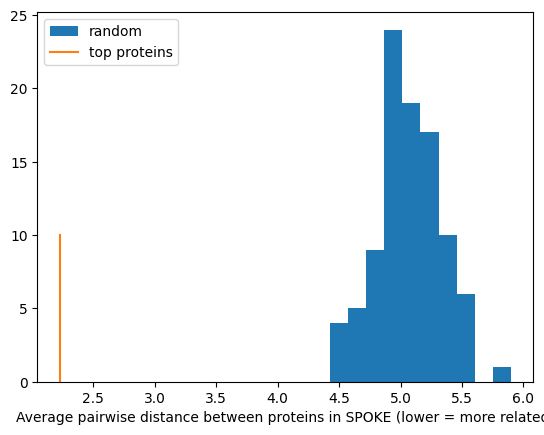

In [50]:
plt.hist(random_stats.average_pairwise_distance, bins=10, label='random')
plt.plot([high_prots_stats['average_pairwise_distance'], high_prots_stats['average_pairwise_distance']], [0, 10], label='top proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

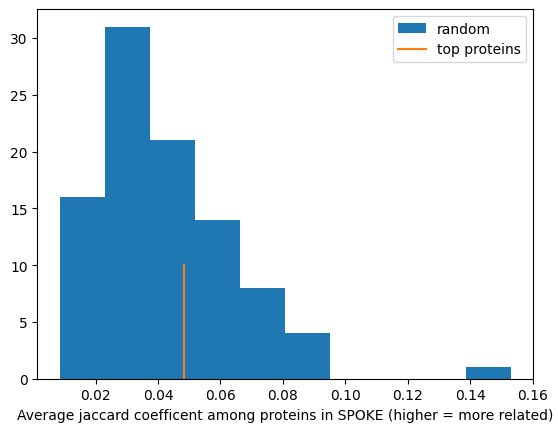

In [51]:
plt.hist(random_stats.average_jaccard, bins=10, label='random')
plt.plot([high_prots_stats['average_jaccard'], high_prots_stats['average_jaccard']], [0, 10], label='top proteins')
plt.xlabel('Average jaccard coefficent among proteins in SPOKE (higher = more related)')
plt.legend()

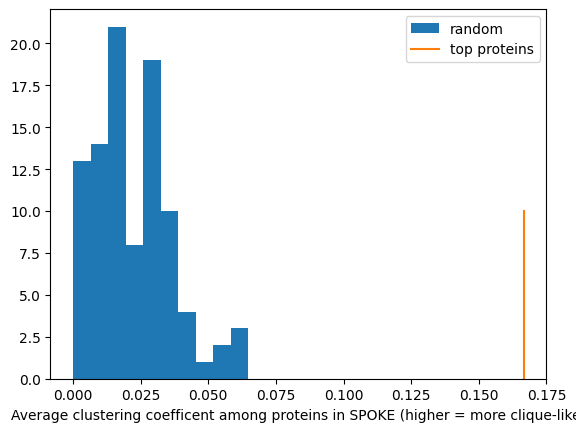

In [52]:
plt.hist(random_stats.clustering, bins=10, label='random')
plt.plot([high_prots_stats['clustering'], high_prots_stats['clustering']], [0, 10], label='top proteins')
plt.xlabel('Average clustering coefficent among proteins in SPOKE (higher = more clique-like)')
plt.legend()

### Negative-weighted protein null model

In [53]:
n_rands = 100
all_stats_low_prots = []
for i in range(n_rands):
    random_prots = kgfe.graph_info.random_nodes_in_category(spoke_graph_ud, 'Protein', len(low_prots_spoke_ids))
    random_prots = [x[0] for x in random_prots]
    try:
        stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, random_prots)
        all_stats_low_prots.append(stats)
    except:
        continue

In [54]:
random_stats = pd.DataFrame(all_stats_low_prots)
random_stats

,average_pairwise_distance,clustering,average_jaccard
0,4.885375,0.029861,0.041513
1,4.861660,0.030142,0.040981
2,5.027668,0.012778,0.045803
3,5.217391,0.017516,0.063241
4,5.490119,0.007896,0.008235
...,...,...,...
94,5.466403,0.040842,0.021739
95,4.636364,0.025906,0.074440
96,5.154150,0.014021,0.055336
97,5.086957,0.012493,0.053689


In [55]:
low_prots_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, low_prots_spoke_ids)

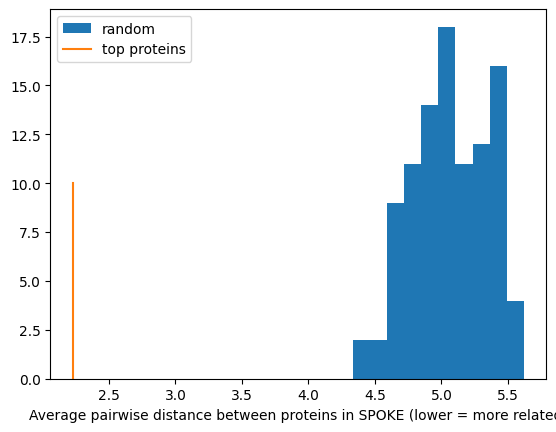

In [56]:
plt.hist(random_stats.average_pairwise_distance, bins=10, label='random')
plt.plot([low_prots_stats['average_pairwise_distance'], high_prots_stats['average_pairwise_distance']], [0, 10], label='top proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

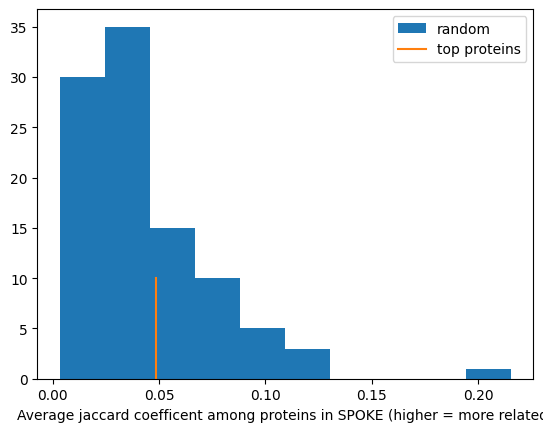

In [57]:
plt.hist(random_stats.average_jaccard, bins=10, label='random')
plt.plot([low_prots_stats['average_jaccard'], high_prots_stats['average_jaccard']], [0, 10], label='top proteins')
plt.xlabel('Average jaccard coefficent among proteins in SPOKE (higher = more related)')
plt.legend()

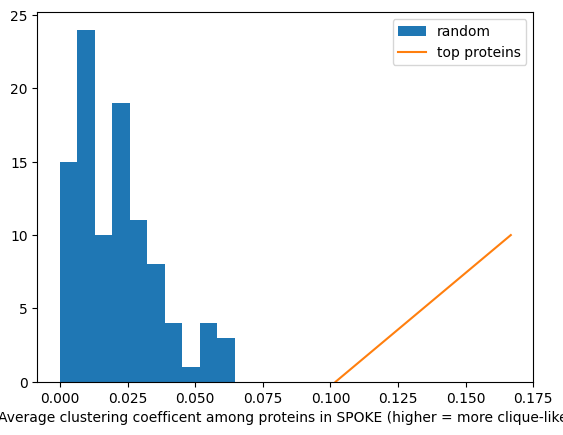

In [58]:
plt.hist(random_stats.clustering, bins=10, label='random')
plt.plot([low_prots_stats['clustering'], high_prots_stats['clustering']], [0, 10], label='top proteins')
plt.xlabel('Average clustering coefficent among proteins in SPOKE (higher = more clique-like)')
plt.legend()

### Top metabolite null model

In [30]:
n_rands = 100
all_stats_high_mets = []
for i in range(n_rands):
    random_prots = kgfe.graph_info.random_nodes_in_category(spoke_graph_ud, 'Compound', len(high_mets_spoke_ids))
    random_prots = [x[0] for x in random_prots]
    try:
        stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, random_prots)
        all_stats.append(stats)
    except:
        continue

In [ ]:
random_stats = pd.DataFrame(all_stats)
random_stats

In [33]:
high_prots_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, high_me)

In [34]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(random_stats.average_pairwise_distance, bins=10, label='random')
plt.plot([high_prots_stats['average_pairwise_distance'], high_prots_stats['average_pairwise_distance']], [0, 10], label='top proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

In [ ]:
plt.hist(random_stats.average_jaccard, bins=10, label='random')
plt.plot([high_prots_stats['average_jaccard'], high_prots_stats['average_jaccard']], [0, 10], label='top proteins')
plt.xlabel('Average jaccard coefficent among proteins in SPOKE (higher = more related)')
plt.legend()

In [ ]:
plt.hist(random_stats.clustering, bins=10, label='random')
plt.plot([high_prots_stats['clustering'], high_prots_stats['clustering']], [0, 10], label='top proteins')
plt.xlabel('Average clustering coefficent among proteins in SPOKE (higher = more clique-like)')
plt.legend()

### Negative-weighted metabolite null model

In [ ]:
n_rands = 100
all_stats_low_prots = []
for i in range(n_rands):
    random_prots = kgfe.graph_info.random_nodes_in_category(spoke_graph_ud, 'Compound', len(low_prots_spoke_ids))
    random_prots = [x[0] for x in random_prots]
    try:
        stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, random_prots)
        all_stats_low_prots.append(stats)
    except:
        continue

In [ ]:
random_stats = pd.DataFrame(all_stats_low_prots)
random_stats

In [ ]:
low_prots_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, low_prots_spoke_ids)

In [ ]:
plt.hist(random_stats.average_pairwise_distance, bins=10, label='random')
plt.plot([low_prots_stats['average_pairwise_distance'], high_prots_stats['average_pairwise_distance']], [0, 10], label='top proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

In [ ]:
plt.hist(random_stats.average_jaccard, bins=10, label='random')
plt.plot([low_prots_stats['average_jaccard'], high_prots_stats['average_jaccard']], [0, 10], label='top proteins')
plt.xlabel('Average jaccard coefficent among proteins in SPOKE (higher = more related)')
plt.legend()

In [ ]:
plt.hist(random_stats.clustering, bins=10, label='random')
plt.plot([low_prots_stats['clustering'], high_prots_stats['clustering']], [0, 10], label='top proteins')
plt.xlabel('Average clustering coefficent among proteins in SPOKE (higher = more clique-like)')
plt.legend()